In [1]:
# import scipy
from sklearn.preprocessing import LabelEncoder, minmax_scale
import pickle
import numpy as np
import pandas as pd
####*IMPORANT*: Have to do this line *before* importing tensorflow
import tensorflow as tf
from matplotlib.backends.backend_pdf import PdfPages
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from collections import defaultdict
import shap
from numba import njit, prange
import seaborn as sns
from statannot import add_stat_annotation


2022-10-12 10:47:27.419398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 10:47:27.419441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names
X has feature na

dict_values([LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()])
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0     0.600000
1     0.545455
2     0.686147
3     0.545455
4     0.750000
5     0.545455
6     0.600000
7     0.545455
8     0.545455
9     0.545455
10    0.5454

NameError: name 'fig1' is not defined

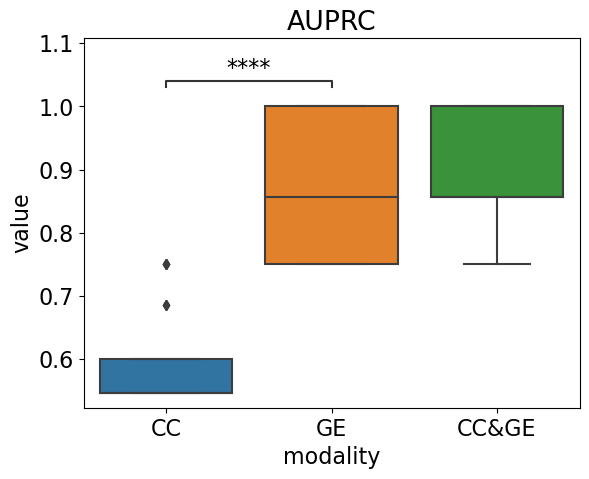

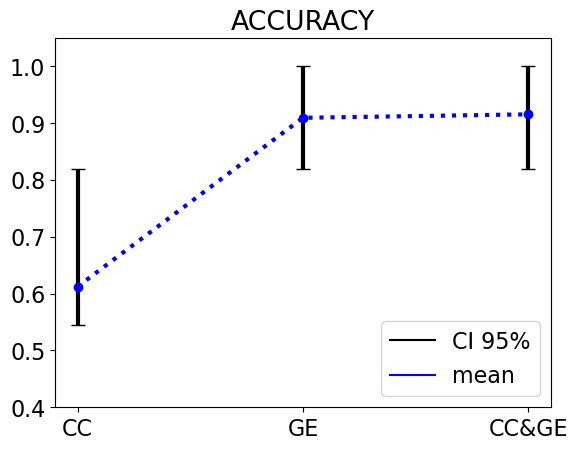

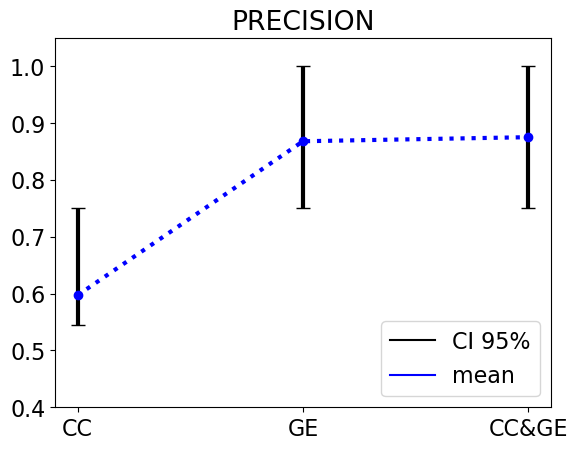

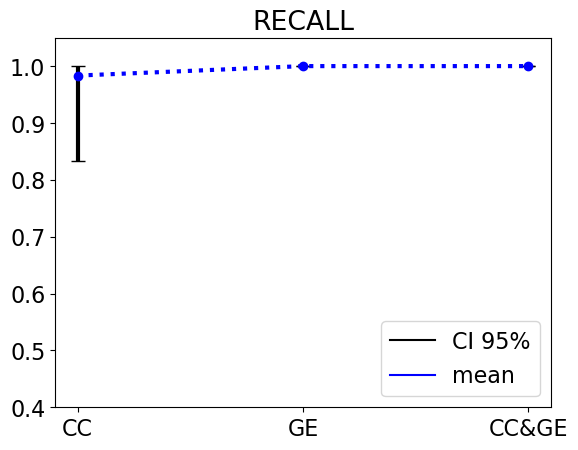

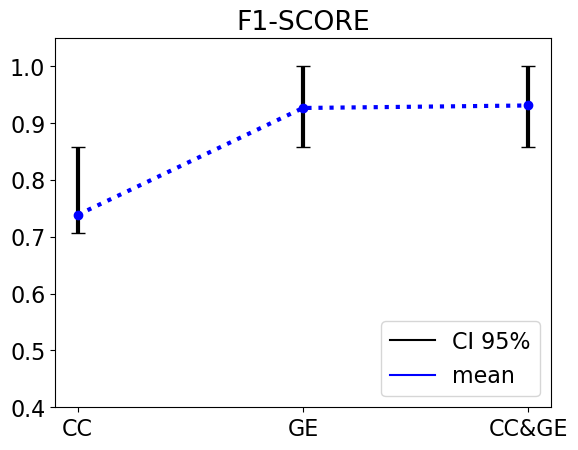

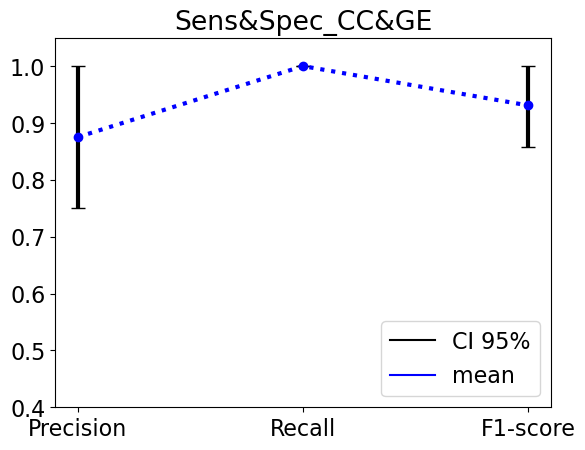

In [19]:
tf.compat.v1.disable_v2_behavior()


x_cell=pd.read_csv ('/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/korean.h5Seurat/annotation.csv',index_col=0)
x_exp=pd.read_csv ('/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/korean.h5Seurat/selected_ge.csv',index_col=0)
# model_j_f=snakemake.input[2]
# model_j_e=snakemake.input[3]
# model_j_c=snakemake.input[4]
# svm_e_f=snakemake.input[6]
# svm_c_f=snakemake.input[7]
# LReg_e_f=snakemake.input[8]
# LReg_c_f=snakemake.input[9]
LogReg_e_f='/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/merged_training/LogReg_GE.pkl'
LogReg_c_f='/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/merged_training/LogReg_CC.pkl'
# Lasso_e_f=snakemake.input[12]
# Lasso_c_f=snakemake.input[13]
# RF_e_f=snakemake.input[14]
# RF_c_f=snakemake.input[15]
# svm_j_f=snakemake.input[16]    
# LReg_j_f=snakemake.input[17]         
LogReg_j_f='/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/merged_training/LogReg_CC_GE.pkl'    
# Lasso_j_f=snakemake.input[19]  
# RF_j_f=snakemake.input[20]

# out1=snakemake.output[0]
# out2=snakemake.output[1]
# out3=snakemake.output[2]
# out_fig=snakemake.output[3]
# out_j_txt=snakemake.output[4]
# out_e_txt=snakemake.output[5]
# out_c_txt=snakemake.output[6]
# out_shap=snakemake.output[7]
# svm_fig=snakemake.output[8]
# LReg_fig=snakemake.output[9]
LogReg_fig='/prj/NUM_CODEX_PLUS/Amina/CellSubmission/Prediction_scOmics/output_rop/korean.h5Seurat/LogReg_fig_metrics.pdf'
# Lasso_fig=snakemake.output[11]
# RF_fig=snakemake.output[12]

def confidence_interval( values):
        mean = np.mean(values)
        alpha = 0.95
        p = ((1.0-alpha)/2.0) * 100
        bottom = max(0.0, np.percentile(values, p))
        p = (alpha+((1.0-alpha)/2.0)) * 100
        top = min(1.0, np.percentile(values, p))
        return mean, bottom, top
def eval_box(metrics,tit):
    f = plt.figure()
    val_vec=list()
    bt_vec=list()
    tp_vec=list()
    x_vec=list()
    for d in metrics:
        val, bt, tp= confidence_interval(metrics[d])
        val_vec.append(val)
        bt_vec.append(val-bt)
        tp_vec.append(tp-val)
        x_vec.append(d)
    
    with plt.rc_context({'figure.figsize': (4, 3), 'figure.dpi':300, "font.size" : 16}):
#         plt.errorbar(x_vec, val_vec, yerr=(bt_vec, tp_vec), linestyle="None",  fmt="ob",  capsize=3,  ecolor="k")
        plt.errorbar(x_vec, val_vec, yerr=(bt_vec, tp_vec),fmt='o', 
            capsize=5,
            ecolor='k', 
            lw=3,
            ls = ':',
            color='blue')
        plt.title(tit)
        plt.ylim(0.4, 1.05)
        plt.plot([], c='k', label='CI 95%')
        plt.plot([], c='blue', label='mean')
        plt.legend(loc="lower right")
#         plt.savefig(tit, format='pdf', dpi=360)
#         plt.show()
    return f



# @njit(parallel=True)
def compute_metrics(y):
    metrics = defaultdict(list)
    col_len= y.shape[1]
    for i in range(col_len):
            l=y.columns[i]
            metrics['auc'].append(skm.roc_auc_score(Ytest,y[l]))
            metrics['acc'].append(skm.accuracy_score(Ytest,y[l]>=0.5))
            metrics['f1'].append(skm.f1_score(Ytest,y[l]>=0.5))
            metrics['rec'].append(skm.recall_score(Ytest,y[l]>=0.5))
            metrics['prc'].append(skm.precision_score(Ytest,y[l]>=0.5))
            metrics['auprc'].append(skm.average_precision_score(Ytest,y[l]))
    return metrics

# @njit(parallel=True)
def predict_loop(model_,data):
    y_score1 = pd.DataFrame([])    
    model_len=len(model_)
    for i in range(model_len):
        model=model_[i]
        y_score1['sampling'+str(i)]=model.predict(data).flatten()
    return y_score1

# @njit(parallel=True)
def shap_loop(model_j, training_set,dim_exp, dim_cells,x_exp,x_cell):
    model_len=len(model_j)
    for i in range(model_len):
        model_joint=model_j[i]
        x_ref_exp=training_set[i][:,:dim_exp]
        x_ref_cell=training_set[i][:,dim_exp:(dim_exp+dim_cells)]

        explainer = shap.DeepExplainer(model_joint, [x_ref_exp,x_ref_cell])
        shap_values = explainer.shap_values([np.array(x_exp),np.array(x_cell)])
        if model_joint ==model_j[0]:
            shap_values_all_exp=shap_values[0][0]
            shap_values_all_cell=shap_values[0][1]                
        else:
            shap_values_all_exp=shap_values_all_exp+shap_values[0][0]
            shap_values_all_cell=shap_values_all_cell+shap_values[0][1]    
    return shap_values_all_exp,shap_values_all_cell



if __name__ == "__main__":
    
#     with open(model_j_f, 'rb') as b:
#         model_j=pickle.load(b)
#     with open(model_j_e, 'rb') as b:
#         model_e=pickle.load(b)
#     with open(model_j_c, 'rb') as b:
#         model_c=pickle.load(b)
#     with open(svm_j_f, 'rb') as b:
#         svm_j=pickle.load(b)
#     with open(svm_e_f, 'rb') as b:
#         svm_e=pickle.load(b)
#     with open(svm_c_f, 'rb') as b:
#         svm_c=pickle.load(b)

#     with open(LReg_j_f, 'rb') as b:
#         LReg_j=pickle.load(b)
#     with open(LReg_e_f, 'rb') as b:
#         LReg_e=pickle.load(b)
#     with open(LReg_c_f, 'rb') as b:
#         LReg_c=pickle.load(b)

    with open(LogReg_j_f, 'rb') as b:
        LogReg_j=pickle.load(b)
    with open(LogReg_e_f, 'rb') as b:
        LogReg_e=pickle.load(b)
    with open(LogReg_c_f, 'rb') as b:
        LogReg_c=pickle.load(b)

#     with open(Lasso_j_f, 'rb') as b:
#         Lasso_j=pickle.load(b)
#     with open(Lasso_e_f, 'rb') as b:
#         Lasso_e=pickle.load(b)
#     with open(Lasso_c_f, 'rb') as b:
#         Lasso_c=pickle.load(b)

#     with open(RF_j_f, 'rb') as b:
#         RF_j=pickle.load(b)
#     with open(LReg_e_f, 'rb') as b:
#         RF_e=pickle.load(b)
#     with open(RF_c_f, 'rb') as b:
#         RF_c=pickle.load(b)

        

    x_exp=x_exp.loc[x_exp['condition'].isin(['Mild','Severe']),:]
    x_cell=x_cell.loc[x_cell['condition'].isin(['Mild','Severe']),:]
    x_cell=x_cell.drop(['Doublet','Eryth','NK_CD56bright'],axis=1)
    x_cell=x_cell.loc[x_exp.index,:]
    
    label= x_cell.iloc[:,-1].values
    x_cell= x_cell.drop('condition',axis=1)
    x_exp= x_exp.drop('condition',axis=1)
    x_exp= x_exp.drop('who_score',axis=1)
    
#     x_cell= x_cell[['B naive','NK','CD8 TEM','CD4 Naive','Platelet','cDC2','CD8 TCM', 'CD16 Mono','pDC',"CD4 Proliferating",'MAIT', 'CD4 TCM',"B memory",  "CD14 Mono","CD4 CTL"]]
    #, 'Treg', "B intermediate",'gdT',"Plasmablast", 'NK Proliferating']]
    
    
    genes = x_exp.columns
    cells = x_cell.columns

    le = LabelEncoder()
    Ytest = le.fit_transform(label)

    x_exp = minmax_scale(x_exp, axis = 0)
    x_cell= x_cell.div(x_cell.sum(axis=1), axis=0)
#     y_score1=predict_loop(list(model_j.values()),[x_exp,x_cell])
#     y_score2=predict_loop(list(model_e.values()),x_exp)
#     y_score3=predict_loop(list(model_c.values()),x_cell)

#     y_score1_svm=predict_loop(list(svm_j.values()),np.concatenate((x_exp,x_cell), axis=1))
#     y_score2_svm=predict_loop(list(svm_e.values()),x_exp)
#     y_score3_svm=predict_loop(list(svm_c.values()),x_cell)

#     y_score1_LReg=predict_loop(list(LReg_j.values()),np.concatenate((x_exp,x_cell), axis=1))
#     y_score2_LReg=predict_loop(list(LReg_e.values()),x_exp)
#     y_score3_LReg=predict_loop(list(LReg_c.values()),x_cell)
    print(LogReg_c.values())
    y_score1_LogReg=predict_loop(list(LogReg_j.values()),np.concatenate((x_exp,x_cell), axis=1))
    y_score2_LogReg=predict_loop(list(LogReg_e.values()),x_exp)
    y_score3_LogReg=predict_loop(list(LogReg_c.values()),x_cell)
    
#     y_score1_Lasso=predict_loop(list(Lasso_j.values()),np.concatenate((x_exp,x_cell), axis=1))
#     y_score2_Lasso=predict_loop(list(Lasso_e.values()),x_exp)
#     y_score3_Lasso=predict_loop(list(Lasso_c.values()),x_cell)

#     y_score1_RF=predict_loop(list(RF_j.values()),np.concatenate((x_exp,x_cell), axis=1))
#     y_score2_RF=predict_loop(list(RF_e.values()),x_exp)
#     y_score3_RF=predict_loop(list(RF_c.values()),x_cell)
    
#     y_score1 = pd.DataFrame([])
#     y_score2 = pd.DataFrame([])
#     y_score3 = pd.DataFrame([])

#     i=0
#     for model in model_j.values():
#         y_score1['sampling'+str(i)]=model.predict([x_exp,x_cell]).flatten()
#         i=i+1
#     i=0    
#     for model in model_e.values():
#         y_score2['sampling'+str(i)]=model.predict(x_exp).flatten()
#         i=i+1
#     i=0    
#     for model in model_c.values():
#         y_score3['sampling'+str(i)]=model.predict(x_cell).flatten()
#         i=i+1
#     all_yscores={out_fig:[y_score1,y_score2,y_score3], svm_fig:[y_score1_svm,y_score2_svm,y_score3_svm]                ,LReg_fig:[y_score1_LReg,y_score2_LReg,y_score3_LReg] }
    all_yscores={LogReg_fig:[y_score1_LogReg,y_score2_LogReg,y_score3_LogReg]}
#                  , RF_fig:[y_score1_RF,y_score2_RF,y_score3_RF] }    
    for key in all_yscores.keys():
#         yscores[1].to_csv(out1)
#         yscores[1].to_csv(out2)
#         yscores[1].to_csv(out3)
#         print(key)
#         print(all_yscores[key][0])
#         print(all_yscores[key][1])
#         print(all_yscores[key][2])
#         print('---------------------------------------------------')
        res_j=compute_metrics(all_yscores[key][0])
        res_e=compute_metrics(all_yscores[key][1])
        res_c=compute_metrics(all_yscores[key][2])

        #compute mean and CI 
        all_met= pd.DataFrame([])
        for d in res_j:
                val, bt, tp= confidence_interval(res_j[d])
                all_met[d]=[val,bt,tp]

        all_met.index=['mean','lower CI','upper CI']
#         all_met.transpose().to_csv(out_j_txt)
        for d in res_e:
                val, bt, tp= confidence_interval(res_e[d])
                all_met[d]=[val,bt,tp]
        all_met.index=['mean','lower CI','upper CI']
#         all_met.transpose().to_csv(out_e_txt)

        for d in res_c:
                val, bt, tp= confidence_interval(res_c[d])
                all_met[d]=[val,bt,tp]

        all_met.index=['mean','lower CI','upper CI']
#         all_met.transpose().to_csv(out_c_txt)


        #plot figures
#         fig1=eval_box_sbn({'CC':res_c['auc'],'GE':res_e['auc'],'CC&GE':res_j['auc']},'AUC')
        fig2=eval_box_sbn({'CC':res_c['auprc'],'GE':res_e['auprc'],'CC&GE':res_j['auprc']},'AUPRC')
        fig3=eval_box({'CC':res_c['acc'],'GE':res_e['acc'],'CC&GE':res_j['acc']},'ACCURACY')
        fig4=eval_box({'CC':res_c['prc'],'GE':res_e['prc'],'CC&GE':res_j['prc']},'PRECISION')
        fig5=eval_box({'CC':res_c['rec'],'GE':res_e['rec'],'CC&GE':res_j['rec']},'RECALL')
        fig6=eval_box({'CC':res_c['f1'],'GE':res_e['f1'],'CC&GE':res_j['f1']},'F1-SCORE')
        fig7=eval_box({'Precision':res_j['prc'],'Recall':res_j['rec'],'F1-score':res_j['f1']},'Sens&Spec_CC&GE')

        pp = PdfPages(key)
        pp.savefig(fig1, bbox_inches='tight')
        pp.savefig(fig2, bbox_inches='tight')
        pp.savefig(fig3, bbox_inches='tight')
        pp.savefig(fig4, bbox_inches='tight')
        pp.savefig(fig5, bbox_inches='tight')
        pp.savefig(fig6, bbox_inches='tight')
        pp.savefig(fig7, bbox_inches='tight')
        pp.close()

    # #SHAP values
#     x_ref_cell=pd.read_csv (snakemake.input[5],index_col=0)
#     x_ref_exp=pd.read_csv (snakemake.input[6],index_col=0)
#     x_ref_exp=x_ref_exp.loc[x_ref_exp['condition'].isin(['Mild','Severe']),:]
#     x_ref_cell=x_ref_cell.loc[x_ref_cell['condition'].isin(['Mild','Severe']),:]
#     x_ref_cell=x_ref_cell.drop(['Doublet','Eryth','NK_CD56bright'],axis=1)

#     x_ref_cell=x_ref_cell.loc[x_ref_exp.index,:]

#     x_ref_cell= x_ref_cell.drop('condition',axis=1)
#     x_ref_exp= x_ref_exp.drop('condition',axis=1)
#     x_ref_exp= x_ref_exp.drop('who_score',axis=1)
#     x_ref_exp = minmax_scale(x_ref_exp, axis = 0)
#     x_ref_cell= x_ref_cell.div(x_ref_cell.sum(axis=1), axis=0)


In [18]:
def eval_box_sbn(metrics,tit):
    f = plt.figure()
    val_vec=list()
    bt_vec=list()
    tp_vec=list()
    x_vec=list()
    data=pd.DataFrame([], columns=["modality",'value'])
    for d in metrics:
        data_=pd.DataFrame([np.full((len(metrics[d])), d),metrics[d]], index=["modality",'value'])
        data=pd.concat([data,data_.transpose()])
#         val, bt, tp= confidence_interval(metrics[d])
#         val_vec.append(val)
#         bt_vec.append(val-bt)
#         tp_vec.append(tp-val)
#         x_vec.append(d)
#     print(np.isnan(np.atleast_1d(data.modality)))
    data.value= data.value.astype('float')
    with plt.rc_context({'figure.figsize': (10, 8), 'figure.dpi':96, "font.size" : 16}):

        g = sns.boxplot(x="modality", y='value', data=data)
    #     g.fig.subplots_adjust(top=0.8)
    #     g.fig.suptitle('HCM vs. DCM') 

        add_stat_annotation(g, x="modality", y='value', data=data,
                        box_pairs=[("CC", "GE")],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
#         plt.show()    
#     with plt.rc_context({'figure.figsize': (4, 3), 'figure.dpi':300, "font.size" : 16}):
# #         plt.errorbar(x_vec, val_vec, yerr=(bt_vec, tp_vec), linestyle="None",  fmt="ob",  capsize=3,  ecolor="k")
#         plt.errorbar(x_vec, val_vec, yerr=(bt_vec, tp_vec),fmt='o', 
#             capsize=5,
#             ecolor='k', 
#             lw=3,
#             ls = ':',
#             color='blue')
        plt.title(tit)
#         plt.ylim(0.4, 1.05)
#         plt.plot([], c='k', label='CI 95%')
#         plt.plot([], c='blue', label='mean')
#         plt.legend(loc="lower right")
#         plt.savefig(tit, format='pdf', dpi=360)
#         plt.show()
    return f


NameError: name 'data' is not defined